In [1]:
import pandas as pd
import numpy as np
import acquire as a
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_db_url

import prepare as p
from IPython.core import display as ICD

### Day 1 Wrangling the dataframe

---

In [2]:
# acquire data
df = a.get_log_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
 7   id          847330 non-null  float64
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 109.9+ MB


In [4]:
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [5]:
# set datetime index
df.set_index('date', inplace=True)

In [6]:
# drop 
df = df.drop(columns=['Unnamed: 0', 'deleted_at'])

In [7]:
df.head()

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


### Moving forward we will prepare the dataframe in a way that is formatted to answer all possible questions.

### This dataframe will:

- drops: 
    - "slack"
    - "id"
    - "deleted_id"
    - "unnamed_0" 
Columns

- Changes 
    - start_date
    - end_date
    - create_at
    - updated_at

Alters the "date" column to include the "time" component and create the date_time column.
Then drop unnecessary columns.


---

# Exploring the Data

### Pulling the inital prepared dataframe

In [8]:
# prepare_logs function found in prepare.py
df = p.prepare_logs()
df = p.get_q6_eda_df()

In [9]:
# sanity check
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


---

_"Email to analyst:_


_Hello,_


_I have some questions for you that I need to be answered before the board meeting Thursday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well."_

### Which lesson appears to attract the most traffic consistently across cohorts (per program)?

First I will drop nulls so that all cohorts match with a path (lesson)

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847329 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        847329 non-null  object        
 1   user_id     847329 non-null  int64         
 2   cohort_id   847329 non-null  float64       
 3   ip          847329 non-null  object        
 4   name        847329 non-null  object        
 5   start_date  847329 non-null  datetime64[ns]
 6   end_date    847329 non-null  datetime64[ns]
 7   created_at  847329 non-null  datetime64[ns]
 8   updated_at  847329 non-null  datetime64[ns]
 9   program_id  847329 non-null  object        
 10  date_time   847329 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 77.6+ MB


##### Assuming that if it is listed in this dataframe, it has recieved traffic as all values have a start and end date. 

How can I answer this question?
- Group by Cohort
- Identify each program
- Get a count of the program per cohort

----

### First, let's create dataframes for each program.

In [11]:
df.program_id.value_counts()

full_stack_java          713365
data_science             103411
full_stack_php            30548
front_end_programming         5
Name: program_id, dtype: int64

- full_stack_java
- data_science
- full_stack_php
- front_end_programming

#### Full Stack Java == fsj

In [12]:
# full stack java dataframe
fsj  = df[df.program_id == 'full_stack_java']
fsj.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24
5,javascript-i/loops,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41
6,javascript-i/conditionals,3,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46
7,javascript-i/functions,3,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:48
8,javascript-i/loops,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:59


---

#### Observing Each Cohort in a Dataframe

In [13]:
dfs = {name:grp.drop('name', axis=1) 
       for name, grp in fsj.reset_index().groupby('name')}

for name, grp in dfs.items():
    print('\033[1m' + name.upper() + '\033[0m')
    ICD.display(grp)

ANDROMEDA


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
187575,221282,assets/js/pdfmake.min.js.map,373,31.0,97.105.19.58,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2019-03-18 16:01:40
187576,221283,/,374,31.0,97.105.19.58,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2019-03-18 16:02:00
187577,221284,toc,374,31.0,97.105.19.58,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2019-03-18 16:02:08
187651,221399,/,376,31.0,173.173.127.101,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2019-03-18 18:53:35
187652,221400,toc,376,31.0,173.173.127.101,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2019-03-18 18:55:34
...,...,...,...,...,...,...,...,...,...,...,...
653759,820578,javascript-ii/promises,385,31.0,69.153.19.127,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2021-02-12 10:56:01
694901,877080,/,385,31.0,69.153.19.127,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2021-04-05 17:05:24
694902,877081,mysql,385,31.0,69.153.19.127,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2021-04-05 17:05:25
694903,877082,mysql/databases,385,31.0,69.153.19.127,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2021-04-05 17:05:29


APEX


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
381300,465528,/,594,56.0,12.106.208.194,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2020-02-24 15:23:42
381301,465529,/,595,56.0,12.106.208.194,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2020-02-24 15:23:43
381302,465530,/,596,56.0,12.106.208.194,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2020-02-24 15:23:44
381303,465531,/,597,56.0,12.106.208.194,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2020-02-24 15:23:48
381304,465532,/,598,56.0,12.106.208.194,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2020-02-24 15:23:48
...,...,...,...,...,...,...,...,...,...,...,...
711071,897354,spring,609,56.0,70.115.90.106,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2021-04-20 09:11:34
711072,897355,spring/setup,609,56.0,70.115.90.106,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2021-04-20 09:11:45
711201,897495,spring/fundamentals/repositories,609,56.0,70.115.90.106,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2021-04-20 09:44:39
711958,898429,java-iii,609,56.0,70.115.90.106,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,full_stack_java,2021-04-20 15:04:46


BASH


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
502066,605668,/,700,61.0,99.43.143.116,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2020-07-20 14:05:55
502069,605671,/,701,61.0,47.184.206.205,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2020-07-20 14:08:19
502070,605672,/,702,61.0,76.221.87.98,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2020-07-20 14:08:26
502071,605673,/,703,61.0,67.11.100.169,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2020-07-20 14:08:29
502072,605674,/,704,61.0,76.185.33.217,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2020-07-20 14:08:30
...,...,...,...,...,...,...,...,...,...,...,...
711560,897927,java-iii/servlets,709,61.0,206.109.18.52,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2021-04-20 11:36:12
711562,897929,search/search_index.json,709,61.0,206.109.18.52,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2021-04-20 11:37:25
711563,897930,spring/fundamentals/repositories,709,61.0,206.109.18.52,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2021-04-20 11:37:32
711604,897971,html-css,705,61.0,136.50.68.20,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,full_stack_java,2021-04-20 11:47:11


BETELGEUSE


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
224927,272788,/,407,32.0,97.105.19.58,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2019-05-29 09:48:59
224931,272792,/,408,32.0,97.105.19.58,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2019-05-29 09:56:08
224933,272794,/,409,32.0,97.105.19.58,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2019-05-29 10:01:23
224934,272795,/,410,32.0,97.105.19.58,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2019-05-29 10:01:28
224935,272796,html-css,409,32.0,97.105.19.58,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2019-05-29 10:01:31
...,...,...,...,...,...,...,...,...,...,...,...
712131,898628,java-ii/inheritance-and-polymorphism,423,32.0,24.175.229.211,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2021-04-20 16:16:19
712140,898639,java-i,423,32.0,24.175.229.211,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2021-04-20 16:22:46
712141,898640,java-i/methods,423,32.0,24.175.229.211,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2021-04-20 16:22:48
713132,899975,search/search_index.json,423,32.0,24.175.229.211,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2021-04-21 13:30:41


CERES


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
248452,299087,/,433,33.0,97.105.19.58,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2019-07-15 15:39:34
248453,299088,toc,433,33.0,97.105.19.58,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2019-07-15 15:39:48
248454,299089,quiz,434,33.0,97.105.19.58,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2019-07-15 15:40:29
248455,299090,/,434,33.0,97.105.19.58,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2019-07-15 15:40:33
248456,299091,javascript-i,433,33.0,97.105.19.58,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2019-07-15 15:40:35
...,...,...,...,...,...,...,...,...,...,...,...
693471,874957,java-i/introduction-to-java,434,33.0,76.198.205.14,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2021-04-04 20:12:54
707785,893207,/,437,33.0,76.185.173.254,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2021-04-16 13:07:48
707786,893208,javascript-ii,437,33.0,76.185.173.254,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2021-04-16 13:07:51
707787,893209,javascript-i,437,33.0,76.185.173.254,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,full_stack_java,2021-04-16 13:07:51


DEIMOS


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
290578,349763,/,488,51.0,97.105.19.58,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2019-09-16 15:45:32
290588,349776,/,489,51.0,97.105.19.58,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2019-09-16 15:59:40
290589,349777,html-css,489,51.0,97.105.19.58,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2019-09-16 15:59:46
290590,349778,javascript-i,489,51.0,97.105.19.58,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2019-09-16 15:59:50
290592,349780,html-css,489,51.0,97.105.19.58,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2019-09-16 15:59:52
...,...,...,...,...,...,...,...,...,...,...,...
713215,900060,jquery/ajax/requests-and-responses,495,51.0,72.191.50.129,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2021-04-21 14:43:08
713216,900061,jquery/mapbox-api,495,51.0,72.191.50.129,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2021-04-21 14:43:09
713217,900062,jquery/ajax/weather-map,495,51.0,72.191.50.129,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2021-04-21 14:43:10
713218,900063,java-i,495,51.0,72.191.50.129,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,full_stack_java,2021-04-21 14:50:36


EUROPA


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
319648,388195,/,516,52.0,97.105.19.58,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2019-11-04 16:03:34
319649,388196,/,517,52.0,97.105.19.58,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2019-11-04 16:03:35
319650,388197,/,518,52.0,97.105.19.58,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2019-11-04 16:03:35
319651,388198,/,519,52.0,97.105.19.58,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2019-11-04 16:03:35
319652,388199,/,520,52.0,97.105.19.58,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2019-11-04 16:03:35
...,...,...,...,...,...,...,...,...,...,...,...
700257,884095,java-ii,524,52.0,108.199.117.235,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2021-04-10 20:17:02
700258,884096,java-ii/junit-tdd,524,52.0,108.199.117.235,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2021-04-10 20:17:05
700259,884097,appendix,524,52.0,108.199.117.235,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2021-04-10 20:20:44
700260,884098,javascript-i/google-maps-api,524,52.0,108.199.117.235,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2021-04-10 20:20:47


FORTUNA


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
351066,428458,/,120,53.0,97.105.19.58,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2020-01-13 16:00:03
351067,428459,toc,120,53.0,97.105.19.58,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2020-01-13 16:01:16
351068,428460,html-css/introduction,120,53.0,97.105.19.58,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2020-01-13 16:01:22
351069,428461,html-css/elements,120,53.0,97.105.19.58,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2020-01-13 16:01:28
351070,428462,/,547,53.0,97.105.19.58,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2020-01-13 16:01:43
...,...,...,...,...,...,...,...,...,...,...,...
691129,871611,javascript-i/functions,571,53.0,166.205.190.141,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2021-03-31 19:22:17
693640,875240,/,120,53.0,104.48.213.175,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2021-04-05 09:02:51
693642,875242,spring,120,53.0,104.48.213.175,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2021-04-05 09:02:56
693644,875244,spring/fundamentals/integration-tests,120,53.0,104.48.213.175,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,full_stack_java,2021-04-05 09:03:01


GANYMEDE


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
402689,491139,/,619,57.0,97.105.19.58,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2020-03-23 14:10:17
402744,491206,/,621,57.0,97.105.19.58,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2020-03-23 15:09:34
402745,491207,/,622,57.0,97.105.19.58,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2020-03-23 15:09:41
402746,491208,/,623,57.0,97.105.19.58,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2020-03-23 15:09:42
402748,491210,/,624,57.0,97.105.19.58,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2020-03-23 15:09:46
...,...,...,...,...,...,...,...,...,...,...,...
713162,900007,javascript-i/objects,642,57.0,173.174.190.7,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2021-04-21 14:08:13
713163,900008,javascript-i/objects/math,642,57.0,173.174.190.7,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2021-04-21 14:08:18
713164,900009,search/search_index.json,642,57.0,173.174.190.7,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2021-04-21 14:08:31
713165,900010,jquery/essential-methods/traversing,642,57.0,173.174.190.7,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2021-04-21 14:08:35


HYPERION


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
456135,553304,/,655,58.0,107.128.2.166,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2020-05-26 16:21:50
456170,553345,toc,655,58.0,107.128.2.166,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2020-05-26 17:03:59
456171,553346,html-css,655,58.0,107.128.2.166,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2020-05-26 17:04:28
456375,553566,/,655,58.0,162.194.247.205,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2020-05-27 00:31:09
456376,553567,/,655,58.0,162.194.247.205,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2020-05-27 00:31:24
...,...,...,...,...,...,...,...,...,...,...,...
713071,899910,mysql/introduction,655,58.0,107.128.2.166,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2021-04-21 12:57:18
713072,899911,mysql/users,655,58.0,107.128.2.166,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2021-04-21 12:57:40
713073,899912,mysql/databases,655,58.0,107.128.2.166,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2021-04-21 12:58:19
713074,899913,mysql/tables,655,58.0,107.128.2.166,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2021-04-21 13:02:28


JUPITER


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
547383,676910,/,748,62.0,99.151.201.25,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2020-09-21 14:20:32
547387,676914,javascript-i,748,62.0,99.151.201.25,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2020-09-21 14:20:40
547388,676915,/,749,62.0,70.94.132.38,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2020-09-21 14:20:49
547389,676916,/,750,62.0,45.20.118.158,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2020-09-21 14:20:53
547390,676917,toc,750,62.0,45.20.118.158,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2020-09-21 14:20:58
...,...,...,...,...,...,...,...,...,...,...,...
712277,898832,spring/setup,773,62.0,70.121.201.159,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2021-04-20 20:39:56
712724,899408,/,756,62.0,108.95.37.118,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2021-04-21 09:42:38
712725,899409,search/search_index.json,756,62.0,108.95.37.118,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2021-04-21 09:42:40
712726,899410,javascript-ii/RESTful-api,756,62.0,108.95.37.118,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2021-04-21 09:42:44


KALYPSO


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
576622,719656,/,788,132.0,173.175.108.125,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:06:55
576623,719658,html-css,788,132.0,173.175.108.125,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:07:00
576624,719659,html-css/introduction,788,132.0,173.175.108.125,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:07:05
576625,719660,/,789,132.0,130.45.76.131,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:07:06
576626,719661,javascript-i,788,132.0,173.175.108.125,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:07:15
...,...,...,...,...,...,...,...,...,...,...,...
713249,900099,java-iii,793,132.0,72.201.107.178,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-21 15:25:19
713250,900100,mysql,793,132.0,72.201.107.178,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-21 15:25:23
713252,900102,mysql/relationships/joins,793,132.0,72.201.107.178,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-21 15:25:26
713342,900199,html-css,793,132.0,72.201.107.178,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-21 16:32:33


LUNA


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
601036,754114,/,819,134.0,107.130.157.190,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2020-12-07 14:15:16
601037,754115,/,820,134.0,70.125.135.252,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2020-12-07 14:15:17
601039,754117,/,821,134.0,136.50.71.97,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2020-12-07 14:15:18
601040,754118,/,822,134.0,24.55.13.38,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2020-12-07 14:15:19
601041,754119,/,823,134.0,66.196.21.182,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2020-12-07 14:15:21
...,...,...,...,...,...,...,...,...,...,...,...
713325,900178,java-iii,825,134.0,193.56.117.60,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2021-04-21 16:12:46
713326,900179,java-iii/user-input,825,134.0,193.56.117.60,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2021-04-21 16:12:47
713329,900184,java-iii/servlets,834,134.0,67.11.50.23,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2021-04-21 16:17:08
713354,900212,java-iii,834,134.0,67.11.50.23,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2021-04-21 16:37:48


MAMMOTH


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
1980,2316,/,72,15.0,108.248.9.192,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2018-01-30 17:40:15
1981,2317,spring,72,15.0,108.248.9.192,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2018-01-30 17:40:21
1982,2318,spring/fundamentals/controllers,72,15.0,108.248.9.192,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2018-01-30 17:40:24
1983,2321,spring/fundamentals/views,72,15.0,108.248.9.192,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2018-01-30 17:40:54
1984,2322,spring/fundamentals/controllers,72,15.0,108.248.9.192,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2018-01-30 17:41:02
...,...,...,...,...,...,...,...,...,...,...,...
260857,312415,java-iii,72,15.0,70.123.215.59,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2019-08-01 15:51:17
260858,312416,java-ii,72,15.0,70.123.215.59,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2019-08-01 15:51:22
260859,312417,java-ii/object-oriented-programming,72,15.0,70.123.215.59,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2019-08-01 15:51:25
260860,312418,javascript-ii,72,15.0,70.123.215.59,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,full_stack_java,2019-08-01 15:51:38


MARCO


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
636089,799198,/,861,135.0,96.8.248.149,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-01-26 12:18:36
636090,799199,toc,861,135.0,96.8.248.149,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-01-26 12:18:57
636101,799210,/,862,135.0,70.94.167.166,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-01-26 12:20:54
636102,799211,/,863,135.0,47.234.188.230,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-01-26 12:20:56
636103,799212,/,864,135.0,74.76.254.34,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-01-26 12:20:56
...,...,...,...,...,...,...,...,...,...,...,...
713348,900206,javascript-i/bom-and-dom/bom,876,135.0,98.6.122.83,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-04-21 16:33:58
713350,900208,javascript-i/bom-and-dom/dom,876,135.0,98.6.122.83,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-04-21 16:34:06
713351,900209,javascript-i/bom-and-dom/dom-events,875,135.0,24.242.150.231,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-04-21 16:35:44
713352,900210,jquery/personal-site,869,135.0,136.50.98.51,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-04-21 16:36:09


NEPTUNE


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
674808,847087,/,895,138.0,96.8.253.119,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-03-15 15:22:31
674813,847128,/,895,138.0,96.8.253.119,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-03-15 15:28:21
674815,847134,/,895,138.0,96.8.253.119,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-03-15 15:29:04
674816,847136,/,895,138.0,96.8.253.119,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-03-15 15:30:47
674817,847143,/,895,138.0,96.8.253.119,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-03-15 15:31:59
...,...,...,...,...,...,...,...,...,...,...,...
713333,900188,html-css/css-ii/bootstrap-grid-system,922,138.0,68.206.162.6,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-04-21 16:20:26
713334,900189,html-css/css-ii/bootstrap-grid-system,925,138.0,70.121.221.55,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-04-21 16:20:47
713347,900205,html-css/css-ii/bootstrap-grid-system,936,138.0,66.69.48.5,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-04-21 16:33:40
713349,900207,html-css/css-ii/bootstrap-grid-system,925,138.0,70.121.221.55,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-04-21 16:33:59


NIAGARA


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
64,72,index.html,21,16.0,71.137.146.71,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2018-01-26 10:59:02
65,73,java-i,21,16.0,71.137.146.71,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2018-01-26 10:59:06
227,254,spring/extra-features/file-upload,40,16.0,97.105.19.61,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2018-01-26 13:57:51
909,1067,jquery,40,16.0,97.105.19.61,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2018-01-29 09:28:24
910,1068,jquery/ajax,40,16.0,97.105.19.61,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2018-01-29 09:28:31
...,...,...,...,...,...,...,...,...,...,...,...
602002,755307,/,143,16.0,68.201.242.151,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2020-12-08 11:01:06
602003,755311,toc,143,16.0,68.201.242.151,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2020-12-08 11:01:16
602004,755312,toc,143,16.0,68.201.242.151,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2020-12-08 11:01:28
602005,755313,appendix,143,16.0,68.201.242.151,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,full_stack_java,2020-12-08 11:01:31


OBERON


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
702470,886729,/,954,139.0,72.177.209.77,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-12 16:44:17
702471,886730,/,955,139.0,70.121.220.245,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-12 16:44:17
702472,886731,/,956,139.0,162.200.114.251,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-12 16:44:18
702473,886732,/,957,139.0,76.185.197.205,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-12 16:44:18
702474,886733,/,958,139.0,69.239.143.192,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-12 16:44:18
...,...,...,...,...,...,...,...,...,...,...,...
713040,899851,javascript-i/testing-user-functions,969,139.0,107.77.169.64,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 12:13:18
713053,899865,javascript-i,969,139.0,107.77.169.64,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 12:31:48
713054,899866,javascript-i/javascript-with-html,969,139.0,107.77.169.64,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 12:31:58
713055,899867,javascript-i/testing-user-functions,969,139.0,107.77.169.64,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 12:32:01


PINNACLES


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
103,112,/,26,18.0,97.105.19.61,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2018-01-26 11:36:27
104,113,javascript-i,26,18.0,97.105.19.61,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2018-01-26 11:36:35
107,116,javascript-i/functions,26,18.0,97.105.19.61,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2018-01-26 11:36:38
997,1157,javascript-i/conditionals,26,18.0,97.105.19.61,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2018-01-29 10:20:35
1403,1621,javascript-i/arrays/manipulating,26,18.0,97.105.19.61,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2018-01-29 16:32:50
...,...,...,...,...,...,...,...,...,...,...,...
708024,893491,search/search_index.json,217,18.0,107.204.50.101,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2021-04-16 14:37:06
708025,893492,jquery/ajax/weather-map,217,18.0,107.204.50.101,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2021-04-16 14:37:14
712560,899183,/,217,18.0,107.204.50.101,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2021-04-21 08:43:11
712561,899184,javascript-i,217,18.0,107.204.50.101,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,full_stack_java,2021-04-21 08:43:13


SEQUOIA


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
19,23,mkdocs/search_index.json,10,21.0,97.105.19.61,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:08:22
20,24,git/merge-conflict-demo,10,21.0,97.105.19.61,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:08:34
21,25,mkdocs/search_index.json,10,21.0,97.105.19.61,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:08:45
22,26,git/working-in-teams,10,21.0,97.105.19.61,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:08:55
32,39,/,10,21.0,97.105.19.61,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:18:22
...,...,...,...,...,...,...,...,...,...,...,...
534857,655285,forms,10,21.0,99.47.142.88,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2020-08-30 00:28:20
534868,655302,html-css/forms,10,21.0,99.47.142.88,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2020-08-30 10:24:15
541629,666542,/,10,21.0,99.47.142.88,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2020-09-10 22:47:01
541630,666543,javascript-ii,10,21.0,99.47.142.88,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2020-09-10 22:47:05


STAFF


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
141226,166284,appendix/further-reading/java/intellij-tomcat-...,53,28.0,97.105.19.58,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2018-12-06 14:15:29
141236,166294,javascript-i,314,28.0,97.105.19.58,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2018-12-06 14:25:40
141237,166295,javascript-i/coffee-project,314,28.0,97.105.19.58,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2018-12-06 14:25:41
141463,166521,spring,40,28.0,170.248.173.247,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2018-12-06 15:31:29
141464,166522,spring/fundamentals/security,40,28.0,170.248.173.247,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2018-12-06 15:31:33
...,...,...,...,...,...,...,...,...,...,...,...
713360,900218,jquery/personal-site,64,28.0,71.150.217.33,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2021-04-21 16:41:51
713361,900219,jquery/mapbox-api,64,28.0,71.150.217.33,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2021-04-21 16:42:02
713362,900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2021-04-21 16:42:09
713363,900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2021-04-21 16:44:37


TEDDY


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
0,4,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24
1,5,javascript-i/loops,2,22.0,97.105.19.61,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41
2,6,javascript-i/conditionals,3,22.0,97.105.19.61,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46
3,7,javascript-i/functions,3,22.0,97.105.19.61,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:48
4,8,javascript-i/loops,2,22.0,97.105.19.61,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:59
...,...,...,...,...,...,...,...,...,...,...,...
713061,899880,javascript-i,20,22.0,104.190.242.242,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2021-04-21 12:44:31
713062,899881,javascript-i/arrays/manipulating,20,22.0,104.190.242.242,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2021-04-21 12:44:42
713063,899882,javascript-i/arrays,20,22.0,104.190.242.242,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2021-04-21 12:44:54
713115,899957,javascript-i/objects,20,22.0,104.190.242.242,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2021-04-21 13:22:02


ULYSSES


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
14672,18711,html-css/css-i,25,23.0,97.105.19.61,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2018-03-05 14:22:48
14673,18712,html-css/forms,25,23.0,97.105.19.61,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2018-03-05 14:22:58
14674,18713,html-css/css-i,25,23.0,97.105.19.61,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2018-03-05 14:23:06
14675,18714,html-css/css-i/introduction,25,23.0,97.105.19.61,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2018-03-05 14:23:08
14676,18715,html-css,25,23.0,97.105.19.61,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2018-03-05 14:23:47
...,...,...,...,...,...,...,...,...,...,...,...
712071,898549,spring,122,23.0,69.130.123.181,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2021-04-20 15:31:29
712194,898706,javascript-i/functions,126,23.0,192.107.1.225,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2021-04-20 17:53:45
713151,899996,/,122,23.0,134.250.1.82,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2021-04-21 13:54:53
713152,899997,spring,122,23.0,134.250.1.82,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,2021-04-21 13:54:58


VOYAGEURS


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
48591,60650,/,182,24.0,97.105.19.61,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2018-05-29 14:42:38
48592,60651,/,183,24.0,97.105.19.61,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2018-05-29 14:42:39
48593,60652,/,184,24.0,97.105.19.61,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2018-05-29 14:42:42
48594,60653,/,185,24.0,97.105.19.61,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2018-05-29 14:42:42
48595,60654,/,186,24.0,97.105.19.61,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2018-05-29 14:42:42
...,...,...,...,...,...,...,...,...,...,...,...
702765,887063,/,186,24.0,66.69.79.50,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2021-04-12 21:55:37
702766,887064,java-i,186,24.0,66.69.79.50,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2021-04-12 21:55:41
702767,887065,java-ii,186,24.0,66.69.79.50,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2021-04-12 21:55:49
702768,887066,java-ii/object-oriented-programming,186,24.0,66.69.79.50,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2021-04-12 21:55:51


WRANGELL


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
72636,88887,registerUser,218,25.0,97.105.19.58,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2018-07-23 13:51:26
72637,88888,registerUser,218,25.0,97.105.19.58,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2018-07-23 13:51:39
72739,89002,/,219,25.0,97.105.19.58,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2018-07-23 15:15:19
72740,89003,/,220,25.0,97.105.19.58,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2018-07-23 15:15:20
72741,89004,/,221,25.0,97.105.19.58,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2018-07-23 15:15:21
...,...,...,...,...,...,...,...,...,...,...,...
713065,899904,search/search_index.json,226,25.0,50.213.66.214,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2021-04-21 12:56:46
713066,899905,appendix/pair-programming,226,25.0,50.213.66.214,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2021-04-21 12:56:51
713067,899906,search/search_index.json,226,25.0,50.213.66.214,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2021-04-21 12:56:58
713068,899907,javascript-ii,226,25.0,50.213.66.214,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,full_stack_java,2021-04-21 12:57:01


XANADU


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
105429,125675,/,259,26.0,97.105.19.58,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2018-09-17 14:12:28
105431,125678,/,260,26.0,97.105.19.58,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2018-09-17 14:13:38
105432,125679,html-css,260,26.0,97.105.19.58,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2018-09-17 14:13:42
105433,125680,/,261,26.0,97.105.19.58,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2018-09-17 14:13:58
105434,125681,/,262,26.0,97.105.19.58,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2018-09-17 14:14:21
...,...,...,...,...,...,...,...,...,...,...,...
655917,823543,mysql,266,26.0,173.172.166.90,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2021-02-20 23:35:11
655918,823544,java-iii,266,26.0,173.172.166.90,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2021-02-20 23:35:13
655919,823545,spring,266,26.0,173.172.166.90,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2021-02-20 23:35:14
655920,823546,capstone,266,26.0,173.172.166.90,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,full_stack_java,2021-02-20 23:35:15


YOSEMITE


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
126867,150000,/,287,27.0,97.105.19.58,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2018-11-05 14:03:58
126868,150001,/,288,27.0,97.105.19.58,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2018-11-05 14:04:58
126869,150002,/,289,27.0,97.105.19.58,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2018-11-05 14:05:18
126873,150006,/,290,27.0,97.105.19.58,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2018-11-05 14:06:41
126874,150007,/,291,27.0,97.105.19.58,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2018-11-05 14:06:51
...,...,...,...,...,...,...,...,...,...,...,...
703738,888383,appendix,291,27.0,24.175.74.13,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2021-04-13 16:22:53
703739,888384,web-design,291,27.0,24.175.74.13,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2021-04-13 16:22:59
703740,888385,web-design/intro,291,27.0,24.175.74.13,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2021-04-13 16:23:03
703741,888386,web-design/ui/typography,291,27.0,24.175.74.13,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,full_stack_java,2021-04-13 16:23:07


ZION


,index,path,user_id,cohort_id,ip,start_date,end_date,created_at,updated_at,program_id,date_time
156062,181754,/,323,29.0,97.105.19.58,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2019-01-22 15:09:54
156063,181755,toc,323,29.0,97.105.19.58,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2019-01-22 15:10:01
156066,181758,/,324,29.0,97.105.19.58,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2019-01-22 15:11:47
156067,181759,toc,323,29.0,97.105.19.58,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2019-01-22 15:11:53
156068,181760,/,325,29.0,97.105.19.58,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2019-01-22 15:11:55
...,...,...,...,...,...,...,...,...,...,...,...
708054,893521,spring/fundamentals/form-model-binding,330,29.0,136.50.54.220,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2021-04-16 14:59:33
708782,894514,/,330,29.0,136.50.54.220,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2021-04-18 13:59:47
708783,894515,mysql,330,29.0,136.50.54.220,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2021-04-18 13:59:49
708784,894516,capstone,330,29.0,136.50.54.220,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,full_stack_java,2021-04-18 13:59:50


---

#### data science == ds

In [14]:
ds = df[df.program_id == 'data_science']
ds.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
326053,/,466,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:58
326054,/,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59
326055,/,468,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59
326056,/,469,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:02
326057,/,470,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:08


In [15]:
ds.name.value_counts()

darden      32015
bayes       26538
curie       21581
easley      14715
florence     8562
Name: name, dtype: int64

#### full stack php = fsp

In [16]:
fsp = df[df.program_id == 'full_stack_php']
fsp.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
30,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47


#### front end programming = fep

In [17]:
fep = df[df.program_id == 'front_end_programming']
fep

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
31627,/,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:01:49
31628,content/html-css,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:01:54
31629,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:01:54
31630,content/html-css,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:02:47
31631,content/html-css/introduction.html,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:02:52


### Now I'll move into identifying the path value counts, and answering the question. 

#### Full Stack Java

In [18]:
fsj_test = pd.DataFrame(fsj.groupby('path').filter(lambda x : len(x)>10000))
fsj_test.path.value_counts()

/                           35814
javascript-i                17457
toc                         17428
search/search_index.json    15212
java-iii                    12683
html-css                    12569
java-ii                     11719
spring                      11376
jquery                      10693
mysql                       10318
java-i                      10016
Name: path, dtype: int64

#### data science

In [19]:
ds_test = pd.DataFrame(ds.groupby('path').filter(lambda x: len(x)>1500))
ds_test.path.value_counts()

/                                           8358
search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
Name: path, dtype: int64

Testing a visualization. Will come back to it later.

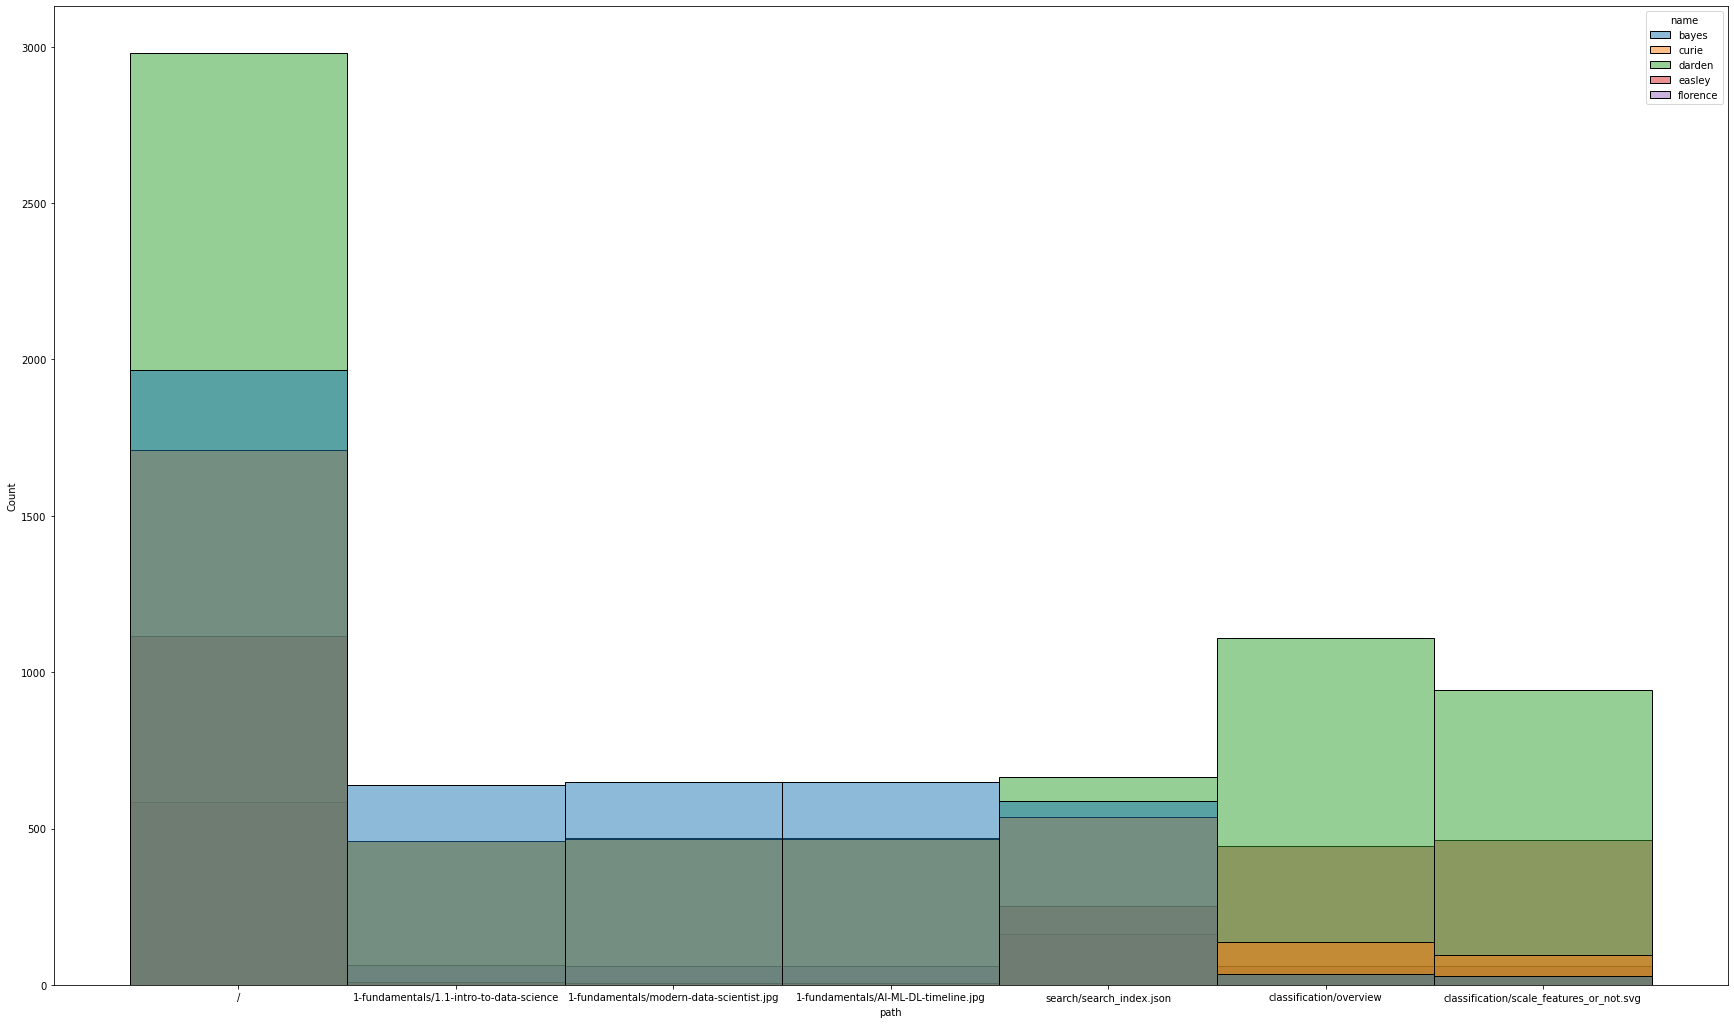

In [20]:
plt.figure(figsize=(30,18))
sns.histplot(data=ds_test, x="path", hue = 'name')
plt.show()

#### full stack php

In [21]:
fsp.path.value_counts()
fsp_test = pd.DataFrame(fsp.groupby('path').filter(lambda x: len(x)>250))
fsp_test.path.value_counts()

/                   1681
index.html          1011
javascript-i         736
html-css             542
spring               501
java-iii             479
java-ii              454
java-i               444
javascript-ii        429
appendix             409
jquery               344
mysql                284
content/html-css     262
Name: path, dtype: int64

#### front end programming

In [22]:
fep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 31627 to 31631
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   path        5 non-null      object        
 1   user_id     5 non-null      int64         
 2   cohort_id   5 non-null      float64       
 3   ip          5 non-null      object        
 4   name        5 non-null      object        
 5   start_date  5 non-null      datetime64[ns]
 6   end_date    5 non-null      datetime64[ns]
 7   created_at  5 non-null      datetime64[ns]
 8   updated_at  5 non-null      datetime64[ns]
 9   program_id  5 non-null      object        
 10  date_time   5 non-null      datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 480.0+ bytes


In [23]:
fep.path.value_counts()

content/html-css                               2
/                                              1
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: path, dtype: int64

##### Front end programming, Full stack php, and full stack java all have html-css at the top of their most visited. Although it isn't in datascience top 10, let's see if there is a significant amount of DS cohorts who look at html-css

In [24]:
ds1 = ds[ds.path == 'html-css']
ds1.path.value_counts()

html-css    16
Name: path, dtype: int64

## Takeaway:

### _"Which lesson appears to attract the most traffic consistently across cohorts (per program)?"_


#### Full Stack Java
The lesson with the most traffic in the Full Stack Java program is Javascript I.

#### Data Science Program
The lesson with the most traffic in the Data Science program is Classification.

#### Full Stack PHP Program
The lesson with the most traffic in the Full Stack PHP program is also Javascript I. 

#### Front End Programming Program
The lesson with the most traffic in the Front End Programming program is HTML-CSS

##### SQL has the most traffic consitently across all cohorts and programs, not including the Front End Programming program which has a sample of 5. 

---

## Which lessons are least accessed?

How to answer this question?

This can be very simple or complex depending on how the question is being asked. I will answer the question 2 different ways, but there are many other ways the question can be observed. 

- Least accessed overall
- Least accessed by program

extra:
- Least accessed by cohort

_least accessed by cohort could work only if I can recreate a dataframe that correctly holds values in 'path' that represent a proper lesson from codeup. As the path is currently jumbled with miscellaneous paths, it would take a extra amounts of time to identify paths then create this dataframe that I do not have for the course of this project_

# Identify only paths

In [53]:
columns = [".md","studentx", "asdf", "home", "index.html", ".ico", "job-board", "selectors", "job-portal",
           "strings", "extra", "teams/13", "case-statements", "where", ".jpeg", ".png", ".xml", ".jpg",
           ".json", "https", ".html", "grades", "notes", "prework", "appendix", ".map", "capstones",
           "capstone", "wp-login", "'", "wp-admin"]

for c in columns:
    df = df[df['path'].str.contains(c)==False]

### Least Accessed Overall

For the least accessed overall, I will identify the least accessed as paths that have been accessed at least 75 times but no more than 100 times. This is because the number of paths that have been accessed less than 75 times is over 9,500. While there may be a lesson in there that has been accessed only once, the sample is too small to call it active or relevant.

In [26]:
abundant_least= pd.DataFrame(df.groupby('path').filter(lambda x: len(x) < 75))
abundant_least.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9569 entries, 24 to 898812
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   path        9569 non-null   object        
 1   user_id     9569 non-null   int64         
 2   cohort_id   9569 non-null   float64       
 3   ip          9569 non-null   object        
 4   name        9569 non-null   object        
 5   start_date  9569 non-null   datetime64[ns]
 6   end_date    9569 non-null   datetime64[ns]
 7   created_at  9569 non-null   datetime64[ns]
 8   updated_at  9569 non-null   datetime64[ns]
 9   program_id  9569 non-null   object        
 10  date_time   9569 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 897.1+ KB


##### Thus, lessons accessed at least 75 times are seen as relevant. 

In [61]:
absolute_least= pd.DataFrame(df.groupby('path').filter(lambda x: len(x) > 75 != len(x) < 100))

In [62]:
absolute_least

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
13,javascript-i,6,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:00:39
31,javascript-i,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:51
34,javascript-i,6,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:15:23
40,spring,10,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:18:24
...,...,...,...,...,...,...,...,...,...,...,...
900199,html-css,793,132.0,72.201.107.178,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-21 16:32:33
900212,java-iii,834,134.0,67.11.50.23,luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2021-04-21 16:37:48
900214,javascript-i,64,28.0,71.150.217.33,staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2021-04-21 16:41:29
900215,javascript-ii,64,28.0,71.150.217.33,staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,2021-04-21 16:41:31


In [63]:
pd.DataFrame(absolute_least.path.value_counts())

,path
javascript-i,18203
toc,17591
java-iii,13166
html-css,13127
java-ii,12177
spring,11883
jquery,11041
mysql,10611
java-i,10467
javascript-ii,10294


---

### Observing the Least access lesson

In [30]:
least_df = df[df['path'].str.contains("6-regression/2-acquire-and-prep")==True]
least_df

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
506604,6-regression/2-acquire-and-prep,616,55.0,70.114.9.241,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 11:39:02
506668,6-regression/2-acquire-and-prep,580,55.0,74.192.167.159,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 12:00:27
506723,6-regression/2-acquire-and-prep,580,55.0,74.192.167.159,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 12:26:49
506747,6-regression/2-acquire-and-prep,580,55.0,74.192.167.159,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 12:52:54
506827,6-regression/2-acquire-and-prep,576,55.0,99.126.113.140,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 13:37:16
...,...,...,...,...,...,...,...,...,...,...,...
685162,6-regression/2-acquire-and-prep,485,34.0,76.211.181.33,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2020-09-28 22:24:42
698576,6-regression/2-acquire-and-prep,485,34.0,173.174.142.84,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2020-10-13 13:40:51
704440,6-regression/2-acquire-and-prep,485,34.0,173.174.142.84,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2020-10-19 13:42:38
704633,6-regression/2-acquire-and-prep,485,34.0,173.174.142.84,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2020-10-19 14:30:47


In [31]:
least_df.name.value_counts()

curie     61
bayes     11
staff      4
darden     1
Name: name, dtype: int64

In [32]:
least_df.date_time.max()

Timestamp('2021-01-22 14:39:22')

## Takeaway

The least access dataframe with the previous mentioned conditions is the `Regression, acquire and prepare lesson.`

This lesson was accessed by the Data Science cohorts `Curie, Bayes and Darden` for a total of `77 times`. The last access date for this lesson was `January 22nd, 2021`.  

---

### Least Accessed by program

### Full-Stack Java

In [69]:
def full_stack_java(df):
    df[df.program_id == 'full_stack_java']
    return fsj

In [70]:
fsj = df[df.program_id == 'full_stack_java']
fsj.head(3)

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24
5,javascript-i/loops,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41
6,javascript-i/conditionals,3,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46


In [71]:
fsj_least= pd.DataFrame(fsj.groupby('path').filter(lambda x: len(x) > 75 != len(x) < 100))
pd.DataFrame(fsj_least.path.value_counts())

,path
regression/project,99
content/php_i/intro-via-interactive-shell,97
5-regression/1-overview,97
clustering/explore,93
3-sql/10-temporary-tables,92
timeseries/acquire,90
Regression_Python,88
4-python/3-data-types-and-variables,88
1-fundamentals/1.2-data-science-pipeline,88
5-stats/2-simulation,88


In [72]:
fsj_least.name.value_counts()

staff         1677
ulysses         21
voyageurs       20
betelgeuse      18
teddy           12
mammoth          9
andromeda        7
wrangell         6
yosemite         6
ceres            5
sequoia          2
xanadu           2
zion             2
pinnacles        1
Name: name, dtype: int64

In [36]:
fsj_least.date_time.max()

Timestamp('2021-04-21 11:13:39')

### Takeaways: 
The least access path in the Full Stack Java Program is the `Time-series, prepare lesson.` I'm assuming this lesson is one inside of the Data Science program. 

This lesson was accessed by the Full Stack Java cohorts, but mainly `Staff` for a total of `76 times`. The last access date for this lesson was `April 21st, 2021`.  

### Data Science Program

In [37]:
def data_science_program(df):
    df[df.program_id == 'data_science']
    return ds

In [38]:
ds = data_science_program(df)

In [39]:
ds.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
326053,/,466,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:58
326054,/,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59
326055,/,468,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59
326056,/,469,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:02
326057,/,470,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:08


In [40]:
def display_least_accessed(df):
    least = pd.DataFrame(df.groupby('path').filter(lambda x: len(x) > 75 != len(x) < 100))
    return pd.DataFrame(least.path.value_counts())

In [41]:
display_least_accessed(ds)

,path
4-python/8.3-intro-to-numpy,98
fundamentals/cli/more-topics,96
1-fundamentals/2.1-spreadsheets-overview,96
6-regression/3-split-and-scale,95
2-storytelling/2.4-present,93
12-distributed-ml/1-overview,89
13-advanced-topics/2-cross-validation,89
12-distributed-ml/spark-execution-diagram.svg,89
12-distributed-ml/spark-local-mode.svg,89
13-advanced-topics/3.6-html-forms,85


In [42]:
ds.date_time.max()

Timestamp('2021-04-21 16:32:50')

### Takeaways: 
The least access path in the Data Science program is the `Story-telling, creating charts` lesson.

This lesson was accessed by the Data Science cohorts for a total of `79 times`. The last access date for this lesson was `April 21st, 2021`.  

### Full Stack PHP

In [43]:
def full_stack_php(df):
    df[df.program_id == 'full_stack_php']
    return fsp

In [44]:
fsp = full_stack_php(df)

In [45]:
display_least_accessed(fsp)

,path
content/php_iv,99
html-css/css-i/introduction,99
mysql/relationships/joins,98
javascript-i/objects/math,96
java-ii/file-io,96
java-ii/exceptions-and-error-handling,95
appendix/capstone-workbook,92
mysql/clauses/order-by,90
jquery/events/mouse-events,88
html-css/css-ii,86


In [46]:
fsp.date_time.max()

Timestamp('2021-04-10 00:28:11')

### Takeaways: 
The least access path in the Full Stack PHP is the `MySQL, intellij` lesson.

This lesson was accessed by the Full Stack PHP cohorts for a total of `76 times`. The last access date for this lesson was `April 10th, 2021`.  

### Front End Programming

In [47]:
def front_end_programming(df):
    df[df.program_id == 'front_end_programming']
    return fep

In [48]:
fep = front_end_programming(df)

In [49]:
display_least_accessed(fep)

,path


### Takeaways:
Front end programming sample size is too small to properly define as having a least accessed lesson, when it didn't offer many lessons to a sizable group of individuals. 